In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Paths
BASE_DIR = r"C:\Users\syeda\Desktop\code\Crash Detection\Test Dataset"
CLASS_FOLDERS = ["0", "1"]  # 0 = non-accident, 1 = accident


In [2]:
image_paths = []
labels = []

for label, class_name in enumerate(CLASS_FOLDERS):
    class_folder = os.path.join(BASE_DIR, class_name)
    for img_file in os.listdir(class_folder):
        if img_file.lower().endswith((".jpg", ".png", ".jpeg")):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(label)

print("Total images found:", len(image_paths))
print("Example image path:", image_paths[0], "Label:", labels[0])


Total images found: 6622
Example image path: C:\Users\syeda\Desktop\code\Crash Detection\Test Dataset\0\1.jpg Label: 0


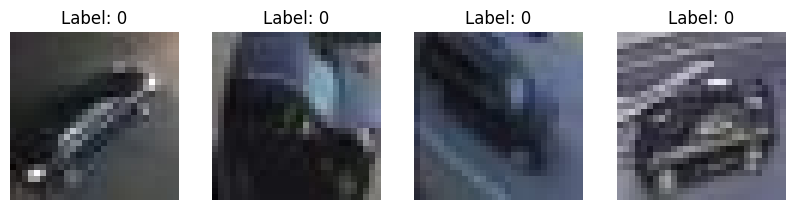

In [3]:
plt.figure(figsize=(10, 5))
for i in range(4):
    img = cv2.imread(image_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()


In [4]:
# 80% train, 20% test
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

print("Training images:", len(train_paths))
print("Testing images:", len(test_paths))

# Save splits as CSV
train_df = pd.DataFrame({"image_path": train_paths, "label": train_labels})
test_df = pd.DataFrame({"image_path": test_paths, "label": test_labels})

train_df.to_csv(os.path.join(BASE_DIR, "train_split.csv"), index=False)
test_df.to_csv(os.path.join(BASE_DIR, "test_split.csv"), index=False)

print("Train/test splits saved as CSV in:", BASE_DIR)


Training images: 5297
Testing images: 1325
Train/test splits saved as CSV in: C:\Users\syeda\Desktop\code\Crash Detection\Test Dataset
